<a href="https://colab.research.google.com/github/kehkasha18/Projects/blob/main/SVM_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Support Vector Classifier:**
*  We need to classify data points into two categories using Support Vector Machine (SVM).

* We'll explore different kernel functions to see which works best for linearly and non-linearly separable data.


In [1]:
import pandas as pd  # Importing pandas for handling data
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced data visualization
from sklearn.datasets import make_classification  # Importing a function to generate synthetic data


**make_classification :**
* is a function in Scikit-Learn that generates synthetic (artificial) datasets for classification problems.
*  It is particularly useful for testing and experimenting with different machine learning algorithms.
* The function returns two outputs:

* **x: The feature matrix (input variables).**
  * x is a NumPy array of shape (1000, 2), meaning it contains 1000 rows and 2 feature columns.

* **y: The target labels (output classes):**
  * y is a NumPy array of shape (1000,), containing the class labels (0 or 1) for each data point.

In [2]:
# Generating a dataset where data points are easily separable (linearly separable data)
x, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
#x is a 2D NumPy array with features for each data point.
#y is a 1D NumPy array with class labels.

## Parameter	Description:
* n_samples :	Number of data points (rows) in the dataset.

* n_features:	Total number of features (columns) in the dataset.

* n_classes :	Number of target classes (e.g., binary classification → 2 classes).
* n_clusters_per_class	Number of clusters per class. Higher values create more complex data.
* n_redundant: 	Number of redundant (correlated) features. These features are linearly dependent on the informative ones.

* random_state:	Ensures reproducibility (same dataset generated every time).

In [7]:
x

array([[ 0.92760007, -0.60886441],
       [ 1.0872693 , -0.46019403],
       [ 1.86804304, -1.269328  ],
       ...,
       [ 0.78961579,  1.23303948],
       [ 1.34073772,  0.72686886],
       [ 1.81634026, -0.26815121]])

In [8]:
y

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [5]:
# Creating a DataFrame to visualize the dataset
pd.DataFrame(x)[0]  # Extracting first feature column
#Column 0 corresponds to the first feature of x.

,0
0,0.927600
1,1.087269
2,1.868043
3,0.731017
4,0.296471
...,...
995,0.961145
996,1.640087
997,0.789616
998,1.340738


In [6]:
pd.DataFrame(x)[1]  # Extracting second feature column
# Column 1 corresponds to the second feature of x.

,1
0,-0.608864
1,-0.460194
2,-1.269328
3,-0.658641
4,1.816913
...,...
995,0.670348
996,-0.488947
997,1.233039
998,0.726869


<Axes: xlabel='0', ylabel='1'>

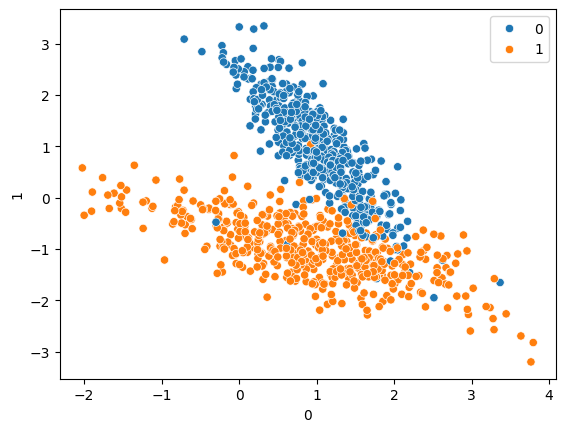

In [9]:
# Plotting the data points to check separability
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)
#hue adds color coding to the scatter plot based on the y values.
# Since y contains class labels (0 and 1), each class will get a different color.


## **Insights:**
The scatterplot shows that data points are clearly separable, meaning a linear SVM can be used.

In [10]:
# Importing necessary machine learning modules
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.model_selection import train_test_split  # Importing function to split data into train and test sets


In [11]:
# Splitting the data into training and testing sets (75% train, 25% test)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=10)


In [12]:

# Initializing and training a linear SVM classifier
svc = SVC(kernel="linear")  # Using a linear kernel since data is linearly separable
svc.fit(xtrain, ytrain)  # Training the model


SVC(kernel='linear')

In [13]:
# Making predictions on test data
ypred = svc.predict(xtest)

In [14]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix  # Importing evaluation metrics
print(classification_report(ytest, ypred))  # Printing classification report
print(confusion_matrix(ytest, ypred))  # Printing confusion matrix


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       126
           1       0.95      0.96      0.96       124

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[120   6]
 [  5 119]]


### Since our data is linearly separable, we get a high accuracy (~96%)

In [21]:
# Now, modifying the dataset to make it non-linearly separable by increasing clusters per class
x, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)


<Axes: xlabel='0', ylabel='1'>

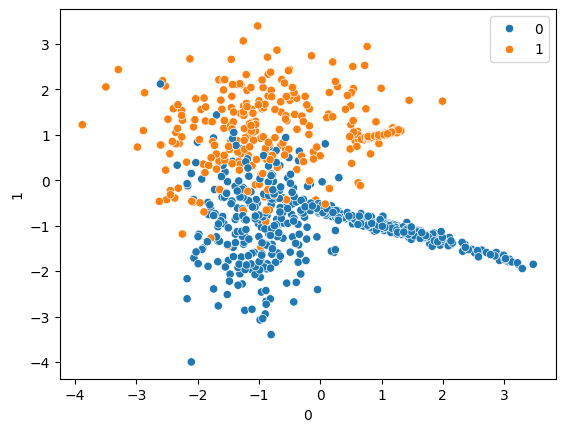

In [22]:
# Plotting the modified dataset
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)
# Insights: The scatterplot shows overlapping data points, meaning a linear SVM may struggle.

In [23]:
# Splitting the modified dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=10)

# Training a linear SVM again
svc = SVC(kernel="linear")  # Using a linear kernel
svc.fit(xtrain, ytrain)

# Making predictions
ypred = svc.predict(xtest)

In [24]:
# Evaluating model performance
print(classification_report(ytest, ypred))  # Printing classification report
print(confusion_matrix(ytest, ypred))  # Printing confusion matrix



              precision    recall  f1-score   support

           0       0.90      0.91      0.91       122
           1       0.91      0.91      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[111  11]
 [ 12 116]]


### Accuracy decreases because data is not linearly separable.

## Using different kernels to handle non-linearly separable data

In [25]:
# RBF Kernel (Radial Basis Function) - Works well for complex data structures
rbf = SVC(kernel="rbf")  # Using RBF kernel
rbf.fit(xtrain, ytrain)  # Training the model
ypred = rbf.predict(xtest)  # Making predictions
print(classification_report(ytest, ypred))  # Evaluating performance
print(confusion_matrix(ytest, ypred))  # Printing confusion matrix

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       122
           1       0.91      0.91      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[111  11]
 [ 12 116]]


In [26]:
# Polynomial Kernel - Useful when decision boundaries are curved
poly = SVC(kernel="poly")  # Using polynomial kernel
poly.fit(xtrain, ytrain)  # Training the model
ypred = poly.predict(xtest)  # Making predictions
print(classification_report(ytest, ypred))  # Evaluating performance
print(confusion_matrix(ytest, ypred))  # Printing confusion matrix

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       122
           1       0.93      0.85      0.89       128

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250

[[114   8]
 [ 19 109]]


In [27]:
# Sigmoid Kernel - Works well for certain complex data distributions
sigmoid = SVC(kernel="sigmoid")  # Using sigmoid kernel
sigmoid.fit(xtrain, ytrain)  # Training the model
ypred = sigmoid.predict(xtest)  # Making predictions
print(classification_report(ytest, ypred))  # Evaluating performance
print(confusion_matrix(ytest, ypred))  # Printing confusion matrix

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       122
           1       0.81      0.91      0.86       128

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[ 95  27]
 [ 11 117]]


### Selecting the best model based on accuracy ---
* From the results, the RBF kernel performed the best


# Hyperparameter tuning using GridSearchCV to optimize SVM parameters

In [28]:
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for parameter tuning

In [29]:
# Defining parameter grid for optimization
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],  # Regularization parameter
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    "kernel": ["rbf"]  # Using RBF kernel
}


In [36]:
# Initializing GridSearchCV
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, refit=True, verbose=3)

# Training the model with the best parameters
grid.fit(xtrain, ytrain)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
# Getting the best parameters
print(grid.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [38]:
# Making predictions with the optimized model
ypred = grid.predict(xtest)

In [39]:
# Evaluating the optimized model
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       122
           1       0.91      0.91      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[111  11]
 [ 12 116]]
